## Deduplicate

Make sure that all the components in each of the scraped JSON files are unique

In [1]:
import json
from tqdm.notebook import tqdm

In [2]:
def dedup(file):
    seen = []
    output = {}
    first = True

    with(open(file, 'r')) as f:
        data = json.load(f)
        print(f"Original length: {len(data['data']['search']['results'])}")
        for part in tqdm(data["data"]["search"]["results"]):
            if part["part"]["id"] not in seen:
                seen.append(part["part"]["id"])
                if first:
                    output = data.copy()
                    output["data"]["search"]["results"] = []
                    first = False
                output["data"]["search"]["results"].append(part)
    
    with(open(file, 'w')) as outfile:
        json.dump(output, outfile)
    print(f"Unique values: {len(output['data']['search']['results'])}")

In [3]:
file = "../data_test/inductors/inductors.json"
dedup(file)

Original length: 75391


  0%|          | 0/75391 [00:00<?, ?it/s]

Unique values: 75389


## Sample Graph

In [6]:
# Load the data
file = "../data/capacitors/film.json"

with(open(file, 'r')) as f:
    data = json.load(f)

In [7]:
results = data["data"]["search"]["results"]

In [47]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results[0]["part"])


{   '__typename': 'Part',
    '_cache_id': 'US-USD-21364577',
    'best_datasheet': {   '__typename': 'Document',
                          'url': 'http://datasheet.octopart.com/PHE450MD6100JR06L2-Kemet-datasheet-48000731.pdf'},
    'best_image': {   '__typename': 'Image',
                      'url': 'https://sigma.octopart.com/23723928/image/Evox-Rifa-PHE450MD6100JR06L2.jpg'},
    'category': {'__typename': 'Category', 'id': '6333'},
    'counts': {   'companion_products': 0,
                  'datasheets': 9,
                  'descriptions': 4,
                  'images': 7,
                  'reference_designs': 0,
                  'similar_parts': 6,
                  'specs': 24},
    'descriptions': [   {   '__typename': 'Description',
                            'text': 'PHE450 100nF Polypropylene Film Capacitor '
                                    '400 V ac; 630 V dc +/-5%'},
                        {   '__typename': 'Description',
                            'text': 'Cap F

In [59]:
import math
import re

count = 0
volumes = []
prices = []
with(open(f"../data/capacitors/aluminum_electrolytic.json", 'r')) as file:
    data = json.load(file)
    for part in tqdm(data["data"]["search"]["results"]):
        specs = part["part"]["specs"]
        height = ""
        diameter = ""
        for spec in specs:
            if spec["attribute"]["shortname"] == "diameter":
                diameter = spec["display_value"]
            if spec["attribute"]["shortname"] == "height_seated_max_":
                height = spec["display_value"]
            if part["part"]['median_price_1000']:
                price = part["part"]['median_price_1000']['converted_price']
        if diameter and height and price:
            prices.append(float(price))
            count += 1
            diameter = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", diameter)[0])
            height = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", height)[0])
            volume = math.pi * pow((diameter / 2), 2) * height
            volumes.append(volume)
#             print(f"volume = pi * ({diameter} / 2)^2 * {height} = {volume} mm^3, price = ${price}")
            
print(f"Total caps with volume information: {count}")

  0%|          | 0/66703 [00:00<?, ?it/s]

Total caps with volume information: 39323


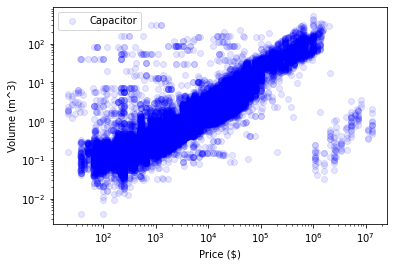

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(volumes, prices, c="b", alpha=0.1, label="Capacitor")
plt.xlabel("Price ($)")
plt.ylabel("Volume (m^3)")
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper left')
plt.show()
